# Card Thumbnail Extractor

In [33]:
# Part 0: Imports
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image

# Helper for showing BGR OpenCV images w/ pyplot
# Matplotlib needs RGB to display, but OpenCV uses BGR format
def imshow_bgr(img_bgr):
    plt.imshow(cv.cvtColor(img_bgr, cv.COLOR_BGR2RGB))

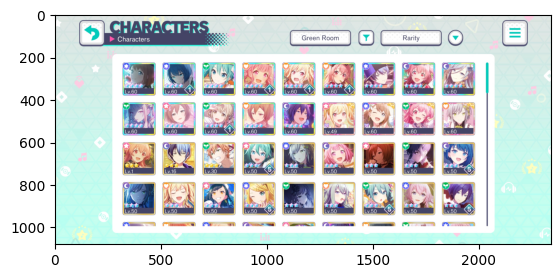

In [34]:
# Part 1: Load image
# OpenCV uses Mat (matrix), while Numpy uses it's own arrays - needs conversion when moving between them
img_mat = cv.imread('./img/character-list.jpg')
imshow_bgr(img_mat)

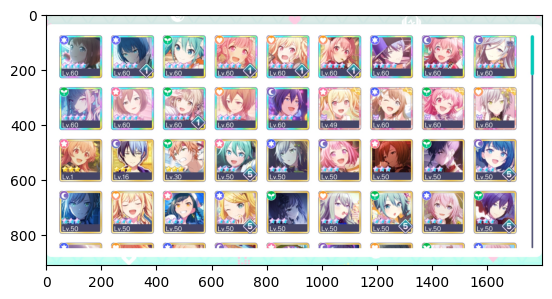

In [56]:
# Part 2: Finding white box containing characters
# May not be necessary, but should make it easier to filter out noise

# First, threshold the image to just white pixels
# https://docs.opencv.org/4.7.0/d7/d4d/tutorial_py_thresholding.html
# Basically, I want anything that's close to white (250+) to remain white, and turn the rest black
img_grayscale = cv.cvtColor(img_mat, cv.COLOR_BGR2GRAY)
_, img_white_only = cv.threshold(img_grayscale, 250, 255, cv.THRESH_BINARY)
# imshow_bgr(img_white_only)

# Find the bounding box for any white rectangles
# This can be done by looking for contours
contours, _ = cv.findContours(img_white_only, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
contour_areas = [cv.contourArea(c) for c in contours]
max_index = np.argmax(contour_areas)
max_contour = contours[max_index]
x, y, w, h = cv.boundingRect(max_contour)

# Because of the moving icons in the background, it seems to blend in with the rectangle
# But should be enough to remove most noise
img_rectangle = img_mat.copy()
cv.rectangle(img_rectangle, (x, y), (x + w, y + h), (0, 255, 0), 2)
# imshow_bgr(img_rectangle)

# Crop the image - note that x and y are flipped in the matrix
img_cropped = img_mat[y:y+h, x:x+w]
imshow_bgr(img_cropped)